# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
merged_data.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice.
mouse_count = merged_data["Mouse ID"].nunique()
mouse_count

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_id = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID"])
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [16]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cleaned_data["Mouse ID"].nunique()
mouse_count

249

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = merged_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Tumor_Volume_Variance=("Tumor Volume (mm3)", "var"),
    Tumor_Volume_Std_Dev=("Tumor Volume (mm3)", "std"),
    Tumor_Volume_Std_Err=("Tumor Volume (mm3)", "sem"))

# Assemble the resulting series into a single summary DataFrame with collum names.
summary_stats.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."]
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats2 = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std="std",
    sem="sem"
)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

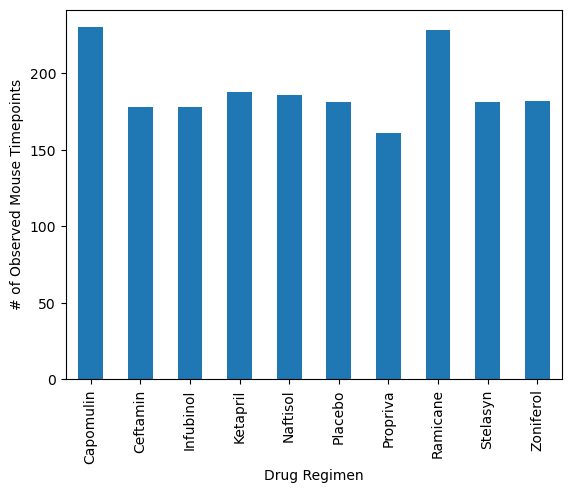

In [87]:
# Count the total number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = merged_data.groupby("Drug Regimen").size()
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts_plot = row_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

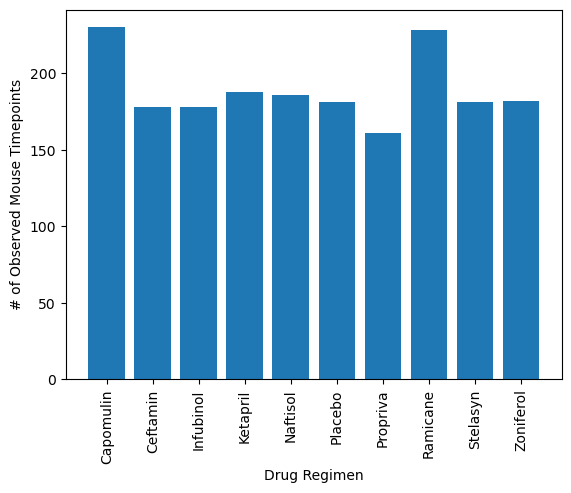

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(row_counts.index, row_counts.values,)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

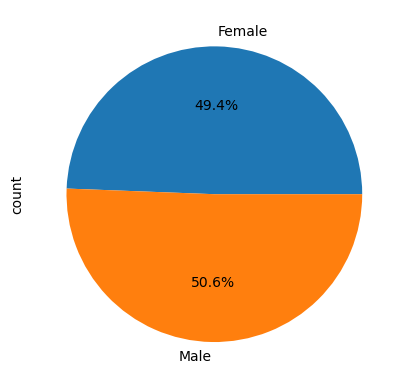

In [92]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
female_vs_males =  merged_data.groupby("Sex").size()

# Make the pie chart
female_vs_males_plot = female_vs_males.plot(kind="pie",autopct="%1.1f%%")
female_vs_males_plot.set_ylabel("count")

plt.show()

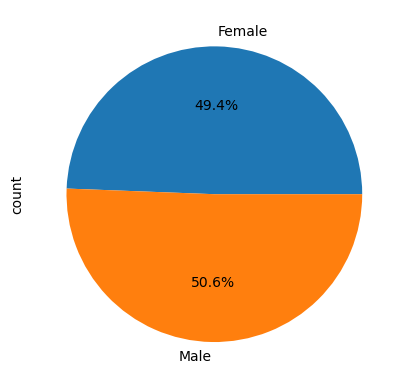

In [105]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
female_vs_males =  merged_data.groupby("Sex").size()
labels = ["Female", "Male"] 
# Make the pie chart
plt.pie(female_vs_males, labels=labels, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = merged_data[merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = treatment_regimens.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, filtered_data, on=["Mouse ID", "Timepoint"])
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    subset = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    #print(outliers)
    print(f"{treatment}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


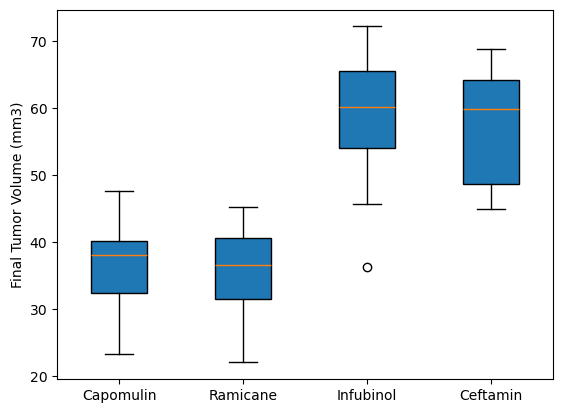

In [118]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

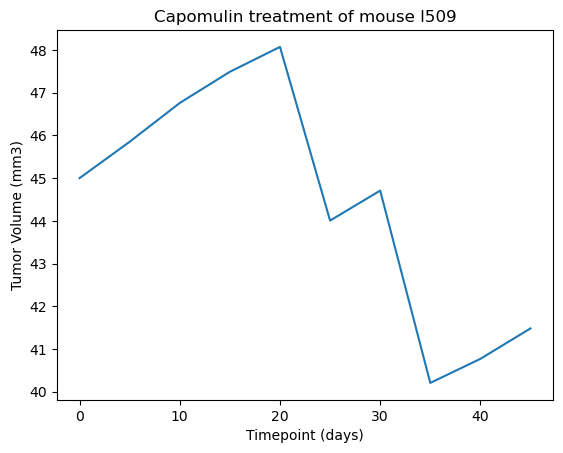

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data by mouse ID and Capomulin
mouse_l509_treatment = merged_data[(merged_data["Mouse ID"] == "l509") & (merged_data["Drug Regimen"] == "Capomulin")]
# Plot data
plt.plot(mouse_l509_treatment["Timepoint"], mouse_l509_treatment["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

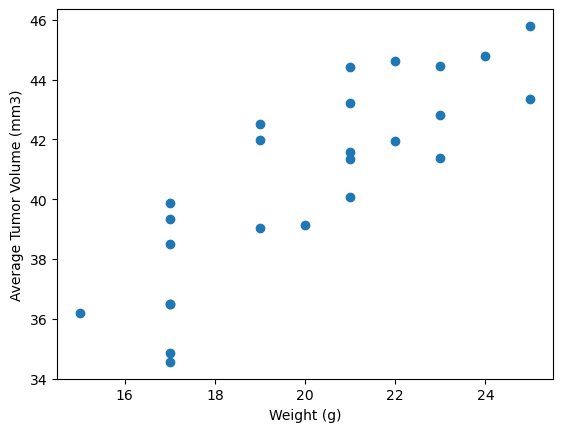

In [141]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
# Calculate average tumor size
average_tumor_size = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_vs_tumor_size = pd.merge(average_tumor_size, mouse_metadata, on="Mouse ID")
# weight_vs_tumor_size

# Plot data
plt.scatter(weight_vs_tumor_size["Weight (g)"], weight_vs_tumor_size["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


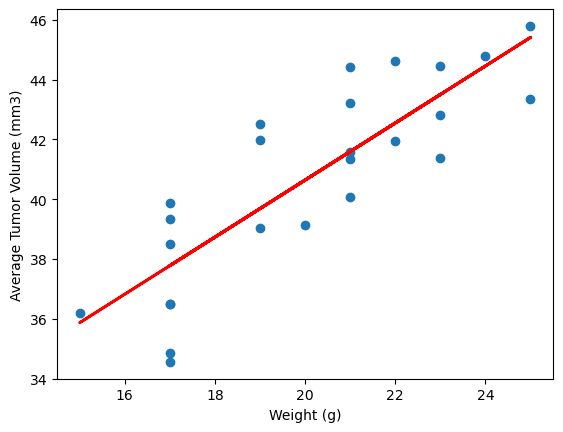

0.9544396890241048 21.552160532685008 0.8419363424694721 1.3225722434712404e-07 0.12754359033201323


In [162]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight_vs_tumor_size["Weight (g)"], weight_vs_tumor_size["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation coefficient
correlation_coefficient = weight_vs_tumor_size["Weight (g)"].corr(weight_vs_tumor_size["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Step 6: Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight_vs_tumor_size["Weight (g)"], 
                                                               weight_vs_tumor_size["Tumor Volume (mm3)"])

# Step 7: Create the regression line
regression_line = slope * weight_vs_tumor_size["Weight (g)"] + intercept

# Step 8: Plot the regression line
plt.plot(weight_vs_tumor_size["Weight (g)"], regression_line, color='red', linewidth=2)
plt.show()
print(slope, intercept, r_value, p_value, std_err)